In [1]:
#Req1
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.ensemble import IsolationForest

In [2]:
#reading data
df = pd.read_csv("creditcard.csv")

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print("Checking Null Values")
df.isnull().sum()

Checking Null Values


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: title={'center': 'Correlation with Class'}, xlabel='Columns', ylabel='Correlation'>

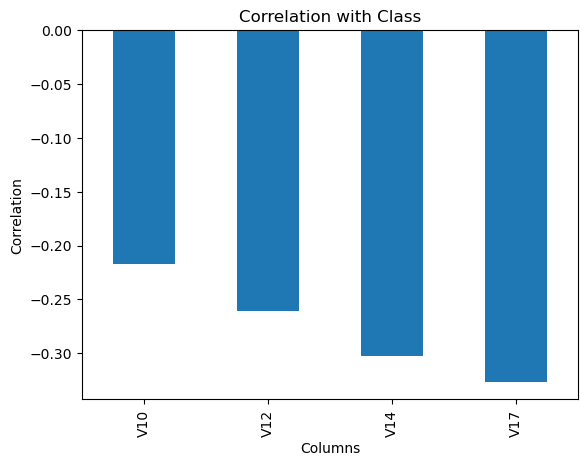

In [5]:
#plotting the relation between the Target{Class} and the rest of the features
#Feature Selection
correlation = df.corrwith(df['Class'])
correlation = correlation.drop('Class')
strong_corr = correlation[abs(correlation) > 0.2]
strong_corr.plot(kind='bar', title='Correlation with Class', ylabel='Correlation', xlabel='Columns')

In [6]:
#Splitting the data into data {x} and target {y}
x = df[strong_corr.index]
y = df['Class']
print(x)

             V10       V12       V14       V17
0       0.090794 -0.617801 -0.311169  0.207971
1      -0.166974  1.065235 -0.143772 -0.114805
2       0.207643  0.066084 -0.165946  1.109969
3      -0.054952  0.178228 -0.287924 -0.684093
4       0.753074  0.538196 -1.119670 -0.237033
...          ...       ...       ...       ...
284802  4.356170  2.711941  4.626942  1.991691
284803 -0.975926  0.915802 -0.675143 -0.025693
284804 -0.484782  0.063119 -0.510602  0.313502
284805 -0.399126 -0.962886  0.449624  0.509928
284806 -0.915427 -0.031513 -0.084316 -0.660377

[284807 rows x 4 columns]


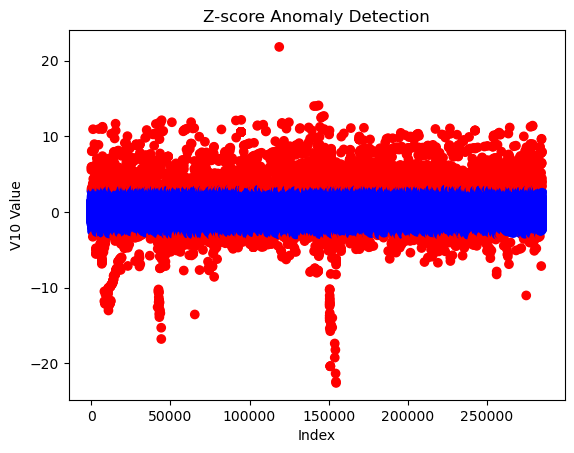

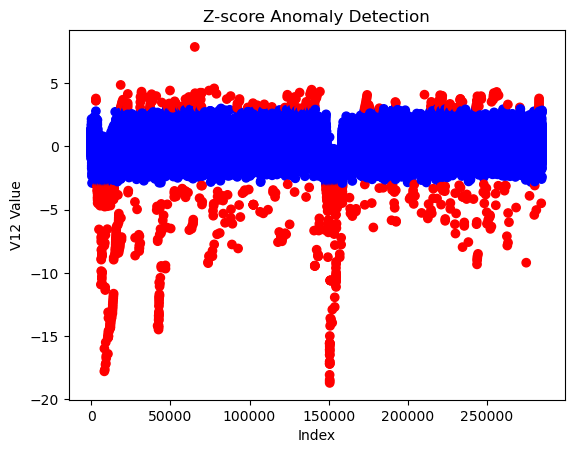

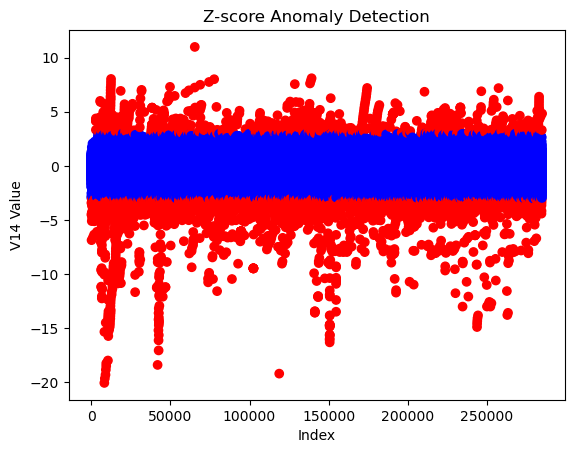

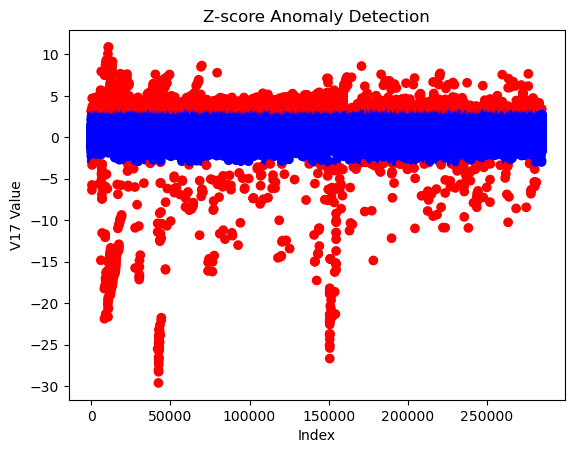

In [7]:
# Z-score calculation
#Req2
# Set threshold
threshold = 3
#Plotting each feature and check its anomaly
for col in strong_corr.index:
    #Z_Score Calculation 
    mean = df[col].mean()
    std = df[col].std()
    temp = (df[col] - mean) / std
    #Classifing data into either more than or less than the threshold
    anom = temp.apply(lambda x: abs(x) > threshold)
    #Visualization
    plt.scatter(df.index, temp, c=anom.map({True: 'red', False: 'blue'}))
    plt.title('Z-score Anomaly Detection')
    plt.xlabel('Index')
    plt.ylabel(f'{col} Value')
    plt.show()


In [8]:
print("The red points show the anomalies and it can be changed by changing the threshold")

The red points show the anomalies and it can be changed by changing the threshold


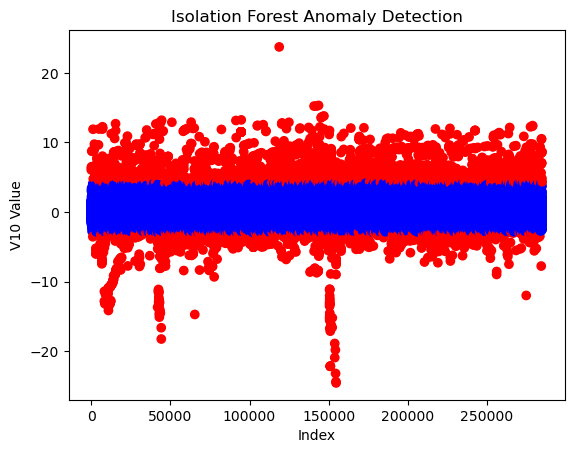

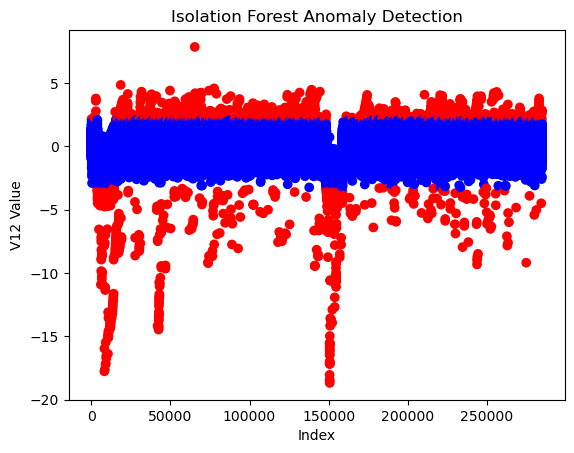

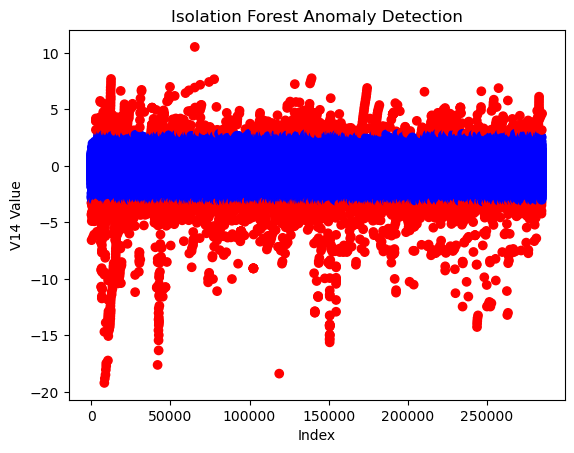

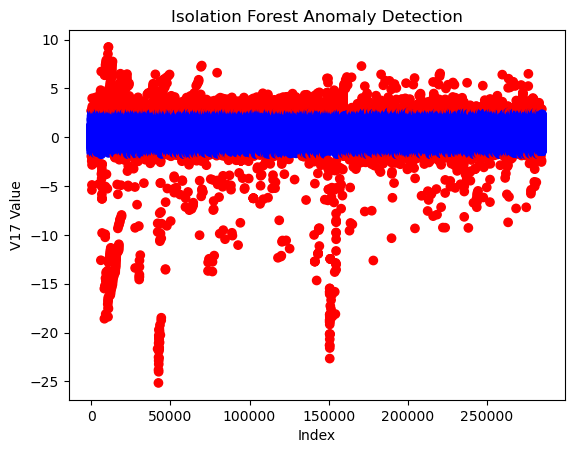

In [9]:
StandScaler = StandardScaler()
#Using Isolation Forest to check single Features
for col in strong_corr.index:
    # Use Isolation Forest
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    #Normalizing The Data and make it 2D array to be fitted into the Algorithm
    x_norm = StandScaler.fit_transform(np.array(x[col]).reshape(-1,1))
    preds = iso_forest.fit_predict(x_norm)

    # In sklearn's IsolationForest:
    # -1 means anomaly
    #  1 means normal point
    colors = np.where(preds == -1, 'red', 'blue')
    #Visualization
    plt.scatter(df.index, df[col], c=colors)
    plt.title('Isolation Forest Anomaly Detection')
    plt.xlabel('Index')
    plt.ylabel(f'{col} Value')
    plt.show()


In [74]:
#Fitting all the features at once to the algorithm
x_norm = StandScaler.fit_transform(x)
y_flipped = 1 - y
#Data splitting into train & test
x_train , x_test , y_train ,  y_test = train_test_split(x_norm, y_flipped, train_size=0.8,random_state=50)
iso_forest = IsolationForest(contamination=0.005, random_state=50,n_estimators=200)

train_pred = iso_forest.fit_predict(x_train,y_train)
#Changing the labels
train_pred[train_pred==-1] = 0


In [76]:
print(f"F1 Score of Training Set {f1_score(train_pred,y_train)}")
print(f"Accuracy of Training Set {accuracy_score(train_pred,y_train)}")
print(f"Recall of Training Set {recall_score(train_pred,y_train)}")
print(f"Precision Score of Training Set {precision_score(train_pred,y_train)}")        


F1 Score of Training Set 0.9980931242375799
Accuracy of Training Set 0.9961991704887094
Recall of Training Set 0.9997132837828897
Precision Score of Training Set 0.9964782075351409


In [77]:
test_pred = iso_forest.fit_predict(x_test)

test_pred[test_pred==-1]=0
print(f"F1 Score of Test Set {f1_score(y_test,test_pred)}")
print(f"Accuracy of Test Set {accuracy_score(y_test,test_pred)}")
print(f"Recall of Test Set {recall_score(y_test,test_pred)}")
print(f"Precision Score of Test Set {precision_score(y_test,test_pred)}")        

F1 Score of Test Set 0.998000898274784
Accuracy of Test Set 0.9960148871177276
Recall of Test Set 0.9962724619333966
Precision Score of Test Set 0.9997353423787427


In [78]:
cm_train = confusion_matrix(y_train,train_pred)
cm_test = confusion_matrix(y_test,test_pred)
Anomalies_Count = y.value_counts()[1]
Anomalies_Guessed = cm_train[0][0]+cm_test[0][0]

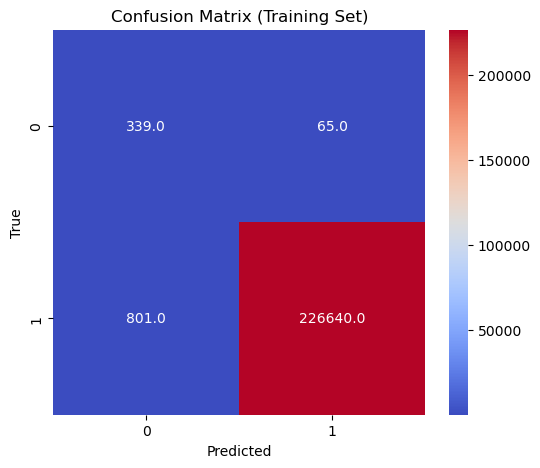

In [79]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train, annot=True, cmap='coolwarm', fmt='.1f', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

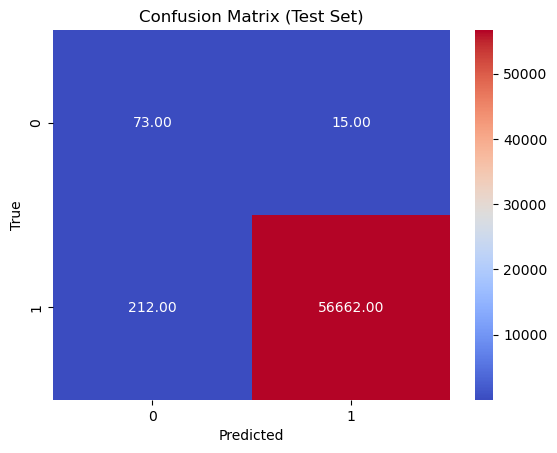

In [81]:
sns.heatmap(cm_test, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [83]:
print(f"From what is noticed the number of anomalies is really low {Anomalies_Count} compared to data set {len(x)}")
print(f"Anomalies are {Anomalies_Count / len(x)*100}%")
print("Precision & Recall is high in this Algorithm which indicates we have few losses due to class inbalance.")
print(f"The Precent of Anomalies Guess Correctly is {Anomalies_Guessed/Anomalies_Count}%")
print(f"The HyperParameter contamination plays a Critical role to enhance detecting anomalies.")

From what is noticed the number of anomalies is really low 492 compared to data set 284807
Anomalies are 0.1727485630620034%
Precision & Recall is high in this Algorithm which indicates we have few losses due to class inbalance.
The Precent of Anomalies Guess Correctly is 0.8373983739837398%
The HyperParameter contamination plays a Critical role to enhance detecting anomalies.
